# Algorithmic trading certificate - Introduction to Market Microstructure Notebook.
In this notebook we will be estimating the volatility signature plot using tick by tick data from the LOBSTER database and comparing it with the signature plot of a brownian motion stochastic process. Also make sure to upload the dataset in the file environment you are using either in colab or jupyter notebook.

In [ ]:
pip install scienceplots

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

In [ ]:
# reads in the required data into an appropriate form
data = pd.read_csv("INTC_2015-01-02_34200000_57600000_orderbook_10.csv",
            names = list(itertools.chain(*[[f"{i}th best bid price", f"{i}th best bid volume", 
                                                   f"{i}th best ask price",f"{i}th best ask volume"]
                                            for i in range(1,11)])))


In [ ]:
data

,1th best bid price,1th best bid volume,1th best ask price,1th best ask volume,2th best bid price,2th best bid volume,2th best ask price,2th best ask volume,3th best bid price,3th best bid volume,...,8th best ask price,8th best ask volume,9th best bid price,9th best bid volume,9th best ask price,9th best ask volume,10th best bid price,10th best bid volume,10th best ask price,10th best ask volume
0,367300,4000,365200,400,367500,200,364800,300,367900,300,...,361800,200,372900,1000,361500,200,373400,2500,360800,200
1,367300,4000,365200,400,367500,200,364800,300,367900,300,...,361800,200,372900,1000,361500,200,373400,2500,360800,200
2,367300,4000,365200,100,367500,200,364800,300,367900,300,...,361800,200,372900,1000,361500,200,373400,2500,360800,200
3,367300,4000,365200,100,367500,200,364800,300,367900,300,...,362900,200,372900,1000,361800,200,373400,2500,361500,200
4,367300,4000,365200,100,367500,200,364800,300,367900,300,...,362900,200,372900,1000,361800,200,373400,2500,361500,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887624,363600,44800,363500,87619,363700,72300,363400,85300,363800,28900,...,362800,8200,364400,54500,362700,13200,364500,17300,362600,5800
887625,363600,44800,363500,87619,363700,71300,363400,85300,363800,28900,...,362800,8200,364400,54500,362700,13200,364500,17300,362600,5800
887626,363600,44800,363500,87619,363700,71300,363400,85300,363800,27900,...,362800,8200,364400,54500,362700,13200,364500,17300,362600,5800
887627,363600,44500,363500,87619,363700,71300,363400,85300,363800,27900,...,362800,8200,364400,54500,362700,13200,364500,17300,362600,5800


##Task one: Calculation of the mid price
The first task requires your to calculate a dataframe with 1 column containing the mid price of the stock from the given data set. Label this column "mid price". Then plot the mid price as a function of time.

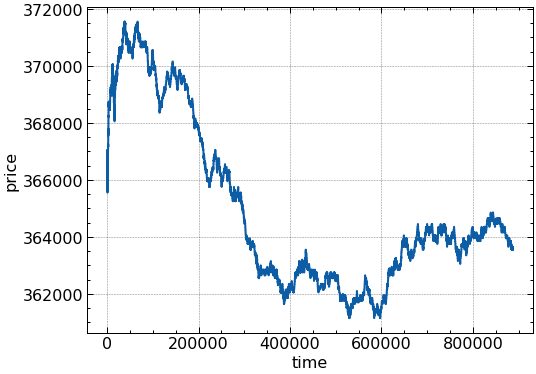

In [ ]:
plt.figure()
plt.xlabel("time")
plt.ylabel("price")
##### mid_price = ENTER CODE HERE ######
plt.plot(mid_price)
plt.show()


##Task 2: Calculate the returns 
here we use a larger timestep to go through and calculate the mean value across window sizes of 1000 and then find the percentage change of these mean values.
This is done as we need to look at a slightly larger scale than trade by trade for normal/cts assumptions to be valid

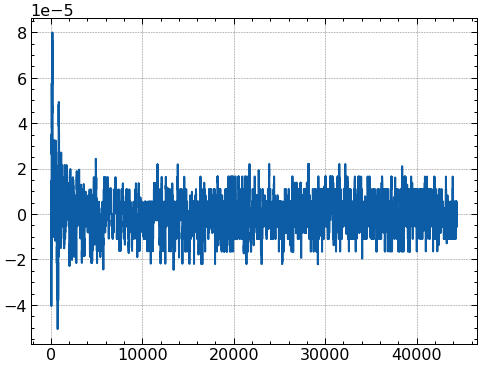

In [ ]:
# the size of groups can be varied but again we need to be able to justify that the process can be considered CTS
###### returns = ENTER CODE HERE #########
plt.plot(returns)

In [ ]:
returns

array([[ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       ...,
       [-5.50074067e-06],
       [-5.50077093e-06],
       [-5.50080119e-06]])

##Task 4: write a function that calculates the Auto correlation function approximation
the auto correlation sequence is a sequence of random variables so is something we can only estimate. to do this we use the following estimator for the autocovariance sequence for the time series $r_t$:
$$\bar{c}(\tau) = \frac{1}{N-\tau}\sum_1^{N-\tau}{(r_t-\bar{r})({(r_{t+\tau}-\bar{r}})}$$

then divide through by the variance of the time series to get the auto correlation function



In [ ]:
def ACF(data, tau):
  if tau == 0:
    return ####### ENTER CODE HERE #########
  
  else:
    r_bar = data.mean()
    N = len(data)
    return ##### ENTER CODE HERE #######


/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


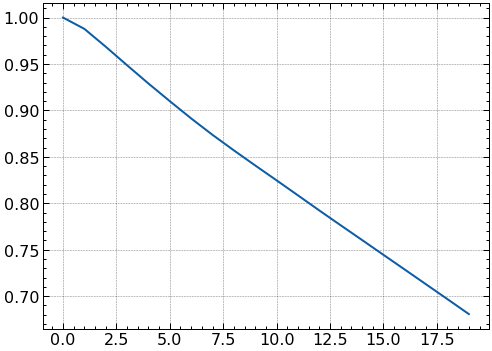

In [ ]:
#### once you have written your ACF function run this to plot the ACF for the returns
plt.plot(np.arange(0,20), [ACF(returns, i) for i in range(0,20)])

##Task 5: Simulating Arithmetic Brownian Motion
starting with intial value 360000 simulate a brownian motion on the same interval as the above data.
note this is done inductively where at each time step we have that 
$$W_{t_{i+1}} = W_{t_i} + N(0, t_{i+1} - t_{i})$$ 
After doing this also verify that the formula in the slide for the ACF of arithmetic brownian motion differences in correct.

In [ ]:
ABM = ####### ENTER CODE HERE ####### 
plt.figure()
plt.plot(ABM)
plt.show()
plt.figure()
plt.plot(ABM.pct_change())
plt.show()


In [ ]:
## once you have written an arithmetic brownian motion run this to see it's sample auto correlation sequence
plt.plot(np.arange(0,14), [ACF(ABM[0:100].diff(), i) for i in range(0,14)])

## Task 6: Writing a function to calculate the Volatility Signature Plot
using the formula for the volatility signature plot:
$$\sigma^2(\tau) = \sigma^2[1+2\sum_{u=1}^{\tau}(1-\frac{u}{\tau})C_r(u)]$$
with $\sigma^2$ equal to the variance of the entire dataset

The previous function from task 4 will be helpful when trying to produce avolatility signature plot

In [ ]:
######## ENTER CODE HERE########
    
